In [1]:
from itertools import product
from tqdm import trange
from sklearn.metrics.pairwise import cosine_similarity
from IPython.core.interactiveshell import InteractiveShell

import pandas as pd
import numpy
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

밥={}
메인={}
국={}
반찬={}
식단_이름 ={}

# 0 : 남성 50 - 64 세 1 : 남성 65 - 74세  2: 남성 75세 이상
# 3 : 여성 50 - 64 세 4 : 여성 65 - 74세  5: 여성 75세 이상

In [2]:
Korea_Food_Standard= []
Korea_Food_Standard_Excel = pd.read_excel('한국인 영양소 섭취기준(비타민 단위 수정)(어긋난것제외).xlsx')
Nutri_name = list(Korea_Food_Standard_Excel.columns[2:])
for index in trange(6):
    Korea_Food_Standard.append((list(Korea_Food_Standard_Excel.loc[index]))[2:])


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 2999.50it/s]


In [69]:


def extract_nutri_list(nutri_df):
    return_list = []
    name_list=[]
    for index_num in range(len(nutri_df)):
        temp_list = []
        temp_list.extend(list(nutri_df.iloc[index_num,5:]))
        name_list.append(nutri_df.iloc[index_num,0])
        
        return_list.append(temp_list)
    return_list.append(name_list)
    return return_list

def Make_Food_Table(basic_food_list):
    result =[]
    for index in range(len(basic_food_list)):
        result.append(basic_food_list[index][:])
    Combination =list(product(*result)) 
    return Combination

def ADD_Total_Nutrition(Combination_Tabel,Standard):
    result_list = []
    Max_Rate = 1.5
    Min_Rate = 0.2
    for i in trange(len(Combination_Tabel)):
        result = numpy.array(Combination_Tabel.iloc[i,0]) + numpy.array(Combination_Tabel.iloc[i,1]) +  numpy.array(Combination_Tabel.iloc[i,2]) + numpy.array(Combination_Tabel.iloc[i,3])
        
     
        
        if(numpy.array_equal((numpy.array(Standard)*Max_Rate) > result ,(numpy.array(Standard)*Min_Rate) < result)):
            result_list.append(result)
    return result_list


# 내가불러올 엑셀 시트 정리
## 접근은 밥['카테고리'][index] 로 접근 [0]번째 요소는 이름 나머지는 영양소 kcal 시작

In [70]:
%%time
# 밥
밥["면"] =extract_nutri_list(pd.read_excel('밥/면.xlsx'))[:-1]
밥["밥"] =extract_nutri_list(pd.read_excel('밥/밥2.xlsx'))[:-1]
밥["빵"] =extract_nutri_list(pd.read_excel('밥/빵.xlsx'))[:-1]
밥["죽"] =extract_nutri_list(pd.read_excel('밥/죽.xlsx'))[:-1]

# 국
국['냉국'] =extract_nutri_list(pd.read_excel('국/냉국.xlsx'))[:-1]
국["전골"] =extract_nutri_list(pd.read_excel('국/전골.xlsx'))[:-1]
국["찌개"] =extract_nutri_list(pd.read_excel('국/찌개.xlsx'))[:-1]
국["탕"] = extract_nutri_list(pd.read_excel('국/탕(어긋난것제외).xlsx'))[:-1]

# 메인반찬
메인["어패류"]  =extract_nutri_list(pd.read_excel("메인/어패류.xlsx"))[:-1]
메인["육류"]  =extract_nutri_list(pd.read_excel("메인/육류(어긋난것제외).xlsx"))[:-1]
메인['기타'] =extract_nutri_list(pd.read_excel('메인/기타.xlsx'))[:-1]

# 서브반찬
반찬["기타"] =extract_nutri_list(pd.read_excel('서브/기타.xlsx'))[:-1]
반찬["김짱"] =extract_nutri_list(pd.read_excel('서브/김짱.xlsx'))[:-1]
반찬["볶튀"] =extract_nutri_list(pd.read_excel('서브/볶튀(어긋난것제외).xlsx'))[:-1]
반찬["조무"] =extract_nutri_list(pd.read_excel('서브/조무.xlsx'))[:-1]
반찬["찜구이"] =extract_nutri_list(pd.read_excel('서브/찜구이.xlsx'))[:-1]

# 이름테이블
식단_이름['밥류'] =extract_nutri_list(pd.read_excel('밥/밥2.xlsx'))[-1]
식단_이름['국,찌개류'] =extract_nutri_list(pd.read_excel('국/탕(어긋난것제외).xlsx'))[-1]
식단_이름['서브'] = extract_nutri_list(pd.read_excel('서브/볶튀(어긋난것제외).xlsx'))[-1]
식단_이름['메인'] = extract_nutri_list(pd.read_excel('메인/육류(어긋난것제외).xlsx'))[-1]


Wall time: 960 ms


In [71]:
Menu = 밥['밥'][:50],국['탕'][:50],반찬['볶튀'][:50],메인['육류'][:50]

Menu_name = 식단_이름['밥류'][:50],식단_이름['국,찌개류'][:50],식단_이름['서브'][:50],식단_이름['메인'][:50]

In [72]:
Combination_Tabel = pd.DataFrame(Make_Food_Table(list(Menu)))
Combination_Tabel_name = pd.DataFrame(Make_Food_Table(list(Menu_name)))


## 상한섭취량 / 열량 빼기 over하는 친구들 

In [73]:
standard = Korea_Food_Standard[0]
Result_Menu = pd.DataFrame(ADD_Total_Nutrition(Combination_Tabel,standard), columns = Nutri_name)


100%|█████████████████████████████| 6250000/6250000 [05:52<00:00, 17754.67it/s]


In [74]:
len(Result_Menu)

9441

In [76]:
if(len(Combination_Tabel_name) == len(Result_Menu)): print('True')
Result_Menu.head()
print(Korea_Food_Standard[0])

,에너지(kcal/일),단백질(g/일),지방(g/일),탄수화물(g/일),총 당류(g/일),식이섬유(g/일),필수아미노산(mg/일),총지방산(g/일),아연(mg/일),구리(mg/일),망간(mg/일),셀레늄(μg/일),비타민 D(μg/일),판토텐산(mg/일),엽산DFE/일)3),비타민 B12(μg/일),콜레스테롤(mg/일/미만)
0,499.2,24.8,10.4,74.9,5.9,4.4,6414.2,9.1,2.9,0.1,0.6,13.7,2.1,1.0,52.8,0.5,52.0
1,488.8,24.3,10.7,71.9,5.9,4.4,6414.2,9.1,2.9,0.1,0.6,13.7,2.1,1.0,52.8,0.5,52.0
2,499.2,24.8,10.4,74.9,5.9,4.4,6414.2,9.1,2.9,0.1,0.6,13.7,2.1,1.0,52.8,0.5,52.0
3,488.8,24.3,10.7,71.9,5.9,4.4,6414.2,9.1,2.9,0.1,0.6,13.7,2.1,1.0,52.8,0.5,52.0
4,505.8,25.7,10.7,75.4,6.0,4.8,6744.2,9.4,3.1,0.1,0.7,13.7,2.1,1.2,58.4,0.5,52.0


[733.3333333333334, 20.0, 17.666666666666668, 82.33333333333333, 27.333333333333332, 8.333333333333334, 5033.333333333335, 12.666666666666666, 3.0, 0.26666666666666666, 1.3333333333333333, 20, 3.3333333333333335, 1.6666666666666667, 133.33333333333334, 0.7999999999999999, 100]


In [77]:
tempre = Result_Menu.describe()
#tempre.to_excel("죽전골기타육류.xlsx")
tempre.loc['mean']

에너지(kcal/일)        671.112562
단백질(g/일)            25.658034
지방(g/일)             15.511810
탄수화물(g/일)          105.514564
총 당류(g/일)            7.197458
식이섬유(g/일)            6.016640
필수아미노산(mg/일)      5871.399894
총지방산(g/일)           12.564824
아연(mg/일)             2.461424
구리(mg/일)             0.115539
망간(mg/일)             0.906207
셀레늄(μg/일)           16.600477
비타민 D(μg/일)          2.701907
판토텐산(mg/일)           1.152908
엽산DFE/일)3)          75.389133
비타민 B12(μg/일)        0.538057
콜레스테롤(mg/일/미만)      61.855916
Name: mean, dtype: float64

In [78]:
pd.DataFrame([Korea_Food_Standard[0] ,tempre.loc['mean'] ], columns = Nutri_name)

,에너지(kcal/일),단백질(g/일),지방(g/일),탄수화물(g/일),총 당류(g/일),식이섬유(g/일),필수아미노산(mg/일),총지방산(g/일),아연(mg/일),구리(mg/일),망간(mg/일),셀레늄(μg/일),비타민 D(μg/일),판토텐산(mg/일),엽산DFE/일)3),비타민 B12(μg/일),콜레스테롤(mg/일/미만)
0,733.333333,20.000000,17.666667,82.333333,27.333333,8.333333,5033.333333,12.666667,3.000000,0.266667,1.333333,20.000000,3.333333,1.666667,133.333333,0.800000,100.000000
1,671.112562,25.658034,15.511810,105.514564,7.197458,6.016640,5871.399894,12.564824,2.461424,0.115539,0.906207,16.600477,2.701907,1.152908,75.389133,0.538057,61.855916




## Result_Menu_List 는 m x 31  2차원
## Korea_Food_Standard 는  31 x 6  2차원



# 코사인 유사도 - 1


In [79]:

result_sim= []
index = []
prob = []
temp_result = []
#Korea_Food_Standard
food_cosine_similarity = cosine_similarity(Result_Menu,[Korea_Food_Standard[0]])


In [80]:


test_standard = [733,20,17,82,27,8.3,5033,250,357,357,887,3.82,75.1,2500,2.1,0.19,0.94,32,47,232,5,5,94,0.12,0.97,0.07,13,133,1,27,100]


In [81]:
pd.DataFrame([Korea_Food_Standard[0],Result_Menu.loc[55268]], columns = Nutri_name)

KeyError: 55268

In [82]:
tempre = Result_Menu.describe()
#tempre.to_excel("빵냉국김짱기타.xlsx")
tempre

,에너지(kcal/일),단백질(g/일),지방(g/일),탄수화물(g/일),총 당류(g/일),식이섬유(g/일),필수아미노산(mg/일),총지방산(g/일),아연(mg/일),구리(mg/일),망간(mg/일),셀레늄(μg/일),비타민 D(μg/일),판토텐산(mg/일),엽산DFE/일)3),비타민 B12(μg/일),콜레스테롤(mg/일/미만)
count,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000
mean,671.112562,25.658034,15.511810,105.514564,7.197458,6.016640,5871.399894,12.564824,2.461424,0.115539,0.906207,16.600477,2.701907,1.152908,75.389133,0.538057,61.855916
std,56.372493,2.403066,3.834866,10.269850,1.505818,1.471641,1321.141914,3.090213,0.929531,0.040430,0.362775,4.267686,0.875241,0.387342,19.236050,0.233356,14.686672
min,387.800000,16.100000,3.700000,56.900000,5.500000,2.200000,1703.200000,2.600000,0.700000,0.100000,0.300000,9.300000,2.100000,0.400000,29.000000,0.200000,36.800000
25%,637.200000,23.900000,12.700000,99.100000,6.000000,5.000000,5297.300000,10.000000,1.600000,0.100000,0.600000,13.900000,2.100000,0.900000,62.100000,0.400000,52.000000
50%,675.500000,25.700000,15.400000,106.200000,6.800000,5.900000,6217.900000,12.700000,2.700000,0.100000,0.900000,15.100000,2.100000,1.200000,72.600000,0.500000,56.000000
75%,710.200000,27.600000,18.100000,112.400000,8.000000,7.000000,6834.800000,15.000000,3.200000,0.100000,1.200000,18.900000,3.300000,1.400000,85.600000,0.600000,67.800000
max,840.900000,30.000000,26.400000,123.400000,15.400000,11.600000,7549.700000,18.900000,4.400000,0.300000,1.900000,29.900000,4.700000,2.400000,199.900000,1.100000,148.700000


In [83]:
print(food_cosine_similarity)

[[0.99750431]
 [0.99739307]
 [0.99750431]
 ...
 [0.99797875]
 [0.99869021]
 [0.998039  ]]


In [84]:

# 0 : 남성 50 - 64 세 1 : 남성 65 - 74세  2: 남성 75세 이상
# 3 : 여성 50 - 64 세 4 : 여성 65 - 74세  5: 여성 75세 이상
    
result_sim = numpy.array([food_cosine_similarity.T[0]])
food_sim_sorted_index_by_cosine = result_sim.argsort()[:,::-1]

top_n = 10
for order in trange(top_n):
    for arr,i in enumerate(food_sim_sorted_index_by_cosine[0]):
        if(arr ==order):
            index.append(i)
            prob.append(result_sim[0][i])

        
Result_Food_Table = Combination_Tabel_name.iloc[index]
Result_Food_Table.columns = ['밥','국','서브반찬','메인반찬']
Result_Food_Table['유사도'] = prob
Result_Food_Table

100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 243.89it/s]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,밥,국,서브반찬,메인반찬,유사도
3725,누룽지,모시조개국,오이볶음,쇠고기산적,0.999963
9089,누룽지,조개국(냉이),콩나물볶음,쇠고기전,0.999961
9128,누룽지,조개국(냉이),풋고추볶음,닭내장구이,0.999961
9090,누룽지,조개국(냉이),콩나물볶음,쇠고기내장(천엽)전,0.999959
9127,누룽지,조개국(냉이),풋고추볶음,닭갈비,0.999959
9121,누룽지,조개국(냉이),풋고추볶음,삼겹살구이,0.999956
8797,누룽지,조개국(냉이),양파볶음,표고쇠고기볶음,0.999955
3354,누룽지,모시조개국,멸치볶음(고추장),돼지고기찜,0.999953
9098,누룽지,조개국(냉이),콩나물볶음,돈육고추장볶음,0.999953
3778,누룽지,모시조개국,양파볶음,닭내장구이,0.999953


In [85]:
print(max(list(result_sim[0])) , min(list(result_sim)[0]))

0.9999627408814441 0.9724596271143144


# 그냥 빼기 - 2 

In [27]:

test_stand= []
standard = pd.read_excel('한국인 영양소 섭취기준.xlsx')

test_stand.append((list(standard.loc[0]))[2:])
test_stand.append((list(standard.loc[1]))[2:])
#test_stand

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

Min_Max_Scaler = MinMaxScaler()

Minus_df = pd.DataFrame()
Before_Min_Max = []

for index in trange(len(result_list)):
    temp =numpy.array(result_list[index]) - test_stand[0]
    temp = [arg**2 for arg in temp]
    Before_Min_Max.append(temp)
    
Min_Max_Result = minmax_scale(Before_Min_Max)
MM_Result = pd.DataFrame(Min_Max_Result)
MM_Result

100%|█████████████████████████████████| 22464/22464 [00:00<00:00, 48411.06it/s]


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.000070,0.151987,0.028579,0.002102,0.691737,0.399110,0.008271,4.361150e-04,0.230763,0.394065,...,0.905608,0.019323,1.000000,0.760870,1.0,0.002294,0.434683,3.906250e-03,0.598968,0.050549
1,0.003946,0.004444,0.034437,0.000568,0.643908,0.373909,0.007892,2.576887e-02,0.363763,0.175265,...,0.899889,0.019323,0.101171,0.554348,1.0,0.002732,0.376030,2.441406e-04,0.004794,0.012954
2,0.002834,0.016265,0.134902,0.000737,0.521213,0.386406,0.031868,9.750571e-02,0.304793,0.168521,...,0.891312,0.012421,0.962136,0.554348,1.0,0.008812,0.401168,2.954102e-02,0.557166,0.002313
3,0.000239,0.003033,0.132486,0.002256,0.691737,0.399110,0.004708,1.113553e-01,0.369480,0.139235,...,0.897030,0.019323,1.000000,0.760870,1.0,0.003209,0.434683,2.441406e-04,0.584866,0.012078
4,0.000134,0.084858,0.009934,0.001469,0.603463,0.270673,0.001605,3.206035e-03,0.239635,0.155140,...,0.859870,0.007668,0.924988,0.463315,1.0,0.048765,0.100901,2.346191e-01,0.242922,0.002590
5,0.022021,0.000681,0.004890,0.000102,0.691737,0.386406,0.004488,2.502448e-03,0.352813,0.111182,...,0.865586,0.017821,1.000000,0.653533,1.0,0.006877,0.379571,2.197266e-03,0.202591,0.025765
6,0.054614,0.033346,0.141038,0.034920,0.510701,0.167095,0.043882,1.135676e-01,0.135174,0.221302,...,0.682808,0.011223,1.000000,0.180707,1.0,0.248795,0.184403,8.789063e-03,0.252040,0.007563
7,0.000254,0.015898,0.022765,0.001733,0.370316,0.175484,0.004771,8.169224e-04,0.307078,0.172817,...,0.865586,0.006534,0.962136,0.653533,1.0,0.010088,0.309330,3.906250e-03,0.393494,0.050549
8,0.016498,0.000840,0.010946,0.001455,0.685664,0.399110,0.002629,7.167338e-03,0.296059,0.145411,...,0.851296,0.019323,1.000000,0.305707,1.0,0.077137,0.181446,3.009266e-34,0.598968,0.055178
9,0.000751,0.162327,0.016321,0.000013,0.838788,0.201883,0.006722,3.459906e-03,0.249263,0.404264,...,0.931343,0.019323,1.000000,0.554348,1.0,0.001893,0.357883,3.906250e-03,0.363429,0.050549


In [40]:
mean_list = []
for index in trange(len(MM_Result)):
    mean_list.append(numpy.sum(MM_Result.loc[index]))


100%|██████████████████████████████████| 22464/22464 [00:04<00:00, 4954.28it/s]


In [41]:
len(mean_list)

22464

Text(0.5, 1.0, 'Nutrition distribution')

<StemContainer object of 3 artists>

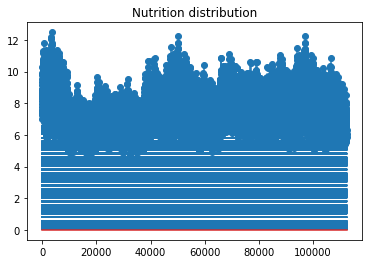

In [42]:
import matplotlib.pyplot as plt

x = numpy.linspace(0,len(mean_list)*5, len(mean_list))

plt.title("Nutrition distribution")
plt.stem(x, numpy.array(mean_list), '-.', use_line_collection =True)
plt.show()

In [43]:
print(max(mean_list), min(mean_list))

12.483321827614182 4.357671720230685


In [44]:
mean_list = numpy.array([mean_list])
food_sim_sorted_index_by_minus = mean_list.argsort()[:,::-1]
food_sim_sorted_index_by_minus


array([[  696, 19416, 10056, ...,  3205,  7381,  6949]], dtype=int64)

In [45]:
bottom_n = 10
index = []
differ = []
for order in trange(len(mean_list[0]) ,0  , -1):
    for arr,i in enumerate(food_sim_sorted_index_by_minus[0]):
        if(arr ==order):
            index.append(i)
            differ.append(mean_list[0][i])

        
Result_Food_Table = Combination_Tabel_name.iloc[index]
Result_Food_Table.columns = ['밥','국','서브반찬','메인반찬']
Result_Food_Table['평균(0)과의 거리'] = differ
Result_Food_Table

100%|███████████████████████████████████| 22464/22464 [01:41<00:00, 221.13it/s]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,밥,국,서브반찬,메인반찬,평균(0)과의 거리
6949,영양밥(돌솥밥),된장국(두부),잡채,소세지구이,4.357672
7381,영양밥(돌솥밥),된장찌개(두부),잡채,소세지구이,4.415334
3205,검정콩밥,된장국(두부),잡채,소세지구이,4.567805
3637,검정콩밥,된장찌개(두부),잡채,소세지구이,4.591990
6517,영양밥(돌솥밥),김치국(고기없음),잡채,소세지구이,4.754217
3277,검정콩밥,된장국(두부),옥수수샐러드,소세지구이,4.799346
7021,영양밥(돌솥밥),된장국(두부),옥수수샐러드,소세지구이,4.827814
2053,검정콩밥,북어국,잡채,소세지구이,4.839434
5941,영양밥(돌솥밥),떡국,잡채,소세지구이,4.872476
6955,영양밥(돌솥밥),된장국(두부),잡채,닭도리탕,4.901954


In [46]:
Result_Food_Table = Combination_Tabel_name.iloc[index]
Result_Food_Table.columns = ['밥','국','서브반찬','메인반찬']
Result_Food_Table['평균(0)과의 거리'] = differ
Result_Food_Table

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,밥,국,서브반찬,메인반찬,평균(0)과의 거리
6949,영양밥(돌솥밥),된장국(두부),잡채,소세지구이,4.357672
7381,영양밥(돌솥밥),된장찌개(두부),잡채,소세지구이,4.415334
3205,검정콩밥,된장국(두부),잡채,소세지구이,4.567805
3637,검정콩밥,된장찌개(두부),잡채,소세지구이,4.591990
6517,영양밥(돌솥밥),김치국(고기없음),잡채,소세지구이,4.754217
3277,검정콩밥,된장국(두부),옥수수샐러드,소세지구이,4.799346
7021,영양밥(돌솥밥),된장국(두부),옥수수샐러드,소세지구이,4.827814
2053,검정콩밥,북어국,잡채,소세지구이,4.839434
5941,영양밥(돌솥밥),떡국,잡채,소세지구이,4.872476
6955,영양밥(돌솥밥),된장국(두부),잡채,닭도리탕,4.901954


In [206]:
len(differ)

22463